In [2]:

import pandas as pd 
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import textblob
import xgboost

from textblob import TextBlob
#pip install textblob

In [3]:
import matplotlib.pyplot as plt
import os

# Reading the translated data (dataset merged on inner join from sales and reviews)

In [4]:
df = pd.read_excel('C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/Sentiment Analysis/Translated Data.xlsx')

In [5]:
df.head()

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,...,duplicate_group_pr,review_url_pr,manufacturer_comment_pr,manufacturer_comment_text_pr,manufacturer_comment_date_pr,has_image_pr,ukey_pr,author_pr,text_pr_translated,summary_pr_translated
0,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,6bab02b3da40d972a5f7bdafea1e5b36,https://www.amazon.de/gp/customer-reviews/R3FJ...,0,NaN,NaN,0,34a1e61c75b343949210a688cb8e3f87,Tsimaki Eleftheria,great products,perfect
1,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,5a3d4e57cac0ee5b25bad4278a613fa8,https://www.amazon.de/gp/customer-reviews/R3SV...,0,NaN,NaN,0,34dd2a026c2892445ca54fc8b86d5354,Produkttestmum,serum luscious texture absorbs quickly skin mo...,moisturizing subtle fragrance
2,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,af8043916a19acf7a7dd31a0035abbb1,https://www.amazon.de/gp/customer-reviews/RRR1...,0,NaN,NaN,0,467d28fcfd1b017dac6939203813c8c1,Vipcold,browser support video allowed test glow boost ...,glitter something much
3,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,38bf347aebe244be64901a6e03dd4dc0,https://www.amazon.de/gp/customer-reviews/RFR7...,0,NaN,NaN,0,a59ee7c935e31fc5c2836f79fc109636,laforge,revitalizing serum tested girlfriend since alr...,light pleasant serum – rich enough days
4,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,...,4173b9b75b65790a1be5279f7f89bbae,https://www.amazon.de/gp/customer-reviews/R3C1...,0,NaN,NaN,0,22a4b816817d2144feab151c8a57af75,Mandragora,neutrogena glow boost revitalizing serum comes...,good serum


In [123]:
df.star_rating_pr

0       5
1       5
2       3
3       4
4       4
       ..
4536    1
4537    5
4538    5
4539    5
4540    2
Name: star_rating_pr, Length: 4541, dtype: int64

# Language Preprocessing

In [6]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import nltk
from nltk.corpus import stopwords

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import datetime 

In [9]:
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')

In [10]:
df['summary_pr_translated'] = df['summary_pr'].astype(str)
df['text_pr_translated'] = df['text_pr'].astype(str)

In [11]:
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    #'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
   # text = text.apply(lambda x: re.sub("  "," ", x))
    return text

clean = lambda x: clean_text(x)


In [12]:
df['summary_pr_translated'] = df['summary_pr_translated'].apply(clean)
df['text_pr_translated'] = df['text_pr_translated'].apply(clean)

In [13]:
# Text Preprocessing:  Lemmitization and stop word removal

df['summary_pr_translated'] = df['summary_pr_translated'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['text_pr_translated'] = df['text_pr_translated'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#df['summary_pr_translated'] = df['summary_pr_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#df['text_pr_translated'] = df['text_pr_translated'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [14]:
#df.to_excel('tranlated_cleaned_data.xlsx')

In [15]:
df.columns

Index(['year', 'date', 'weeknum', 'fiscal_year', 'fiscal_month', 'retailer',
       'country', 'manufacturer', 'category', 'brand',
       ...
       'duplicate_group_pr', 'review_url_pr', 'manufacturer_comment_pr',
       'manufacturer_comment_text_pr', 'manufacturer_comment_date_pr',
       'has_image_pr', 'ukey_pr', 'author_pr', 'text_pr_translated',
       'summary_pr_translated'],
      dtype='object', length=124)

# Sentiment Score Analysis

In [16]:
df['text_sentiment_sc'] = df["text_pr_translated"].apply(lambda x: TextBlob(x).sentiment.polarity )
df['summary_sentiment_sc'] = df["summary_pr_translated"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [17]:
df.shape

(4541, 126)

Can redefine the threshold value for categorizing Sentiment scores as positive, negative etc after discussion

# Defining a Threshold Value for SC score to assess categories of very positive, positive, neutral, very negative and negative sentiments

In [18]:
df['sentiment_text'] = np.where(df.text_sentiment_sc>0.07,'Very Positive',np.where(df.text_sentiment_sc>=0.04,'Positive',np.where(df.text_sentiment_sc<=-0.07,'Too Negative',np.where(df.text_sentiment_sc<=-0.05, 'Negative','Neutral'))))

In [45]:
df['text_sentiment_sc'].describe()

count    4541.000000
mean        0.104740
std         0.211204
min        -0.700000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
Name: text_sentiment_sc, dtype: float64

In [19]:
df['sentiment_summary']=np.where(df.summary_sentiment_sc>0.07,'Very Positive',np.where(df.summary_sentiment_sc>=0.04,'Positive',np.where(df.summary_sentiment_sc<=-0.07,'Too Negative',np.where(df.summary_sentiment_sc<=-0.05, 'Negative','Neutral'))))

In [29]:
%matplotlib inline
pd.set_option('display.max_columns',500)

In [30]:
df.head()

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,asin,title,gfo,gsr_level_1,gsr_level_2,gsr_level_3,gsr_level_4,is_competitor,isavc_vc,isinventory_vc,issales_vc,isprofitero_pr,first_party_ordered_sales_vc,first_party_ordered_sales_currency_code_vc,first_party_ordered_sales_local_vc,first_party_ordered_sales_local_currency_code_vc,first_party_ordered_units_vc,average_sales_price_vc,first_party_shipped_sales_vc,first_party_shipped_sales_currency_code_vc,shipped_cogs_amount_vc,shipped_cogs_currency_code_vc,first_party_shipped_units_vc,customer_return_vc,free_replacements_vc,preordered_revenue_amount_vc,preordered_revenue_currency_code_vc,preordered_units_vc,shipped_subcategory_sales_rank_vc,ordered_subcategory_sales_rank_vc,replenishable_out_of_stock_vc,lost_buy_box_vc,glance_views_vc,conversion_rate_vc,net_received_amount_vc,net_received_amount_currency_code_vc,net_received_units_vc,open_purchase_order_quantity_vc,inventory_sell_through_rate_vc,sellable_on_hand_inventory_amount_vc,sellable_on_hand_inventory_currency_code_vc,sellable_on_hand_amount_trailing_30_day_average_amount_vc,sellable_on_hand_amount_trailing_30_day_average_currency_code_vc,sellable_on_hand_units_vc,unsellable_on_hand_inventory_amount_vc,unsellable_on_hand_inventory_currency_code_vc,unsellable_on_hand_amount_trailing_30_day_average_amount_vc,unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc,unsellable_on_hand_units_vc,aged_90_plus_days_sellable_inventory_amount_vc,aged_90_plus_days_sellable_inventory_currency_code_vc,aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc,aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc,aged_90_plus_days_sellable_units_vc,unhealthy_inventory_amount_vc,unhealthy_inventory_currency_code_vc,unhealthy_units_trailing_30_day_average_vc,unhealthy_units_vc,unfilled_customer_ordered_units_vc,available_units_vc,weeks_on_hand_vc,receive_fill_rate_vc,overall_vendor_lead_time_vc,selling_program_name_vc,availability_pr,regular_price_pr,promotion_text_pr,promotion_price_pr,first_party_won_buy_box_pr,third_party_seller_pr,add_on_item_pr,prime_exclusive_pr,promo_type_pr,product_title_vc,parent_asin_vc,isbn_13_vc,ean_vc,upc_vc,release_date_vc,list_price_vc,binding_vc,author_artist_vc,sitb_vc,clothing_size_vc,clothing_size_width_vc,product_group_vc,replenishment_code_vc,model_style_number_vc,colour_vc,colour_count_vc,prep_instructions_required_vc,prep_instructions_vendor_state_vc,brand_code_vc,brand_vc,manufacturer_code_vc,parent_manufacturer_code_vc,local_currency,target_currency,ex_rate,date&asin,summary_pr,text_pr,star_rating_pr,unique_pr,duplicate_group_pr,review_url_pr,manufacturer_comment_pr,manufacturer_comment_text_pr,manufacturer_comment_date_pr,has_image_pr,ukey_pr,author_pr,text_pr_translated,summary_pr_translated,text_sentiment_sc,summary_sentiment_sc,sentiment_text,sentiment_summary,Mon_Year
0,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B07BVW522M,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",Skin Health,Face Care,Moisturisers,Regular,NaN,False,Yes,True,True,Yes,222.7,USD,185.23,EUR,20,9.3,177.85,EUR,186.73,EUR,20,0,0,0,EUR,0.0,83.0,173.0,0.0983,0.0,156,0.1282,112.2,EUR,12.0,60.0,0.0,7786.77,EUR,9540.51,EUR,826.0,72.64,EUR,70.52,EUR,8.0,6506.9,EUR,7248.78,EUR,689.0,0.0,EUR,0.0,0.0,86.0,740.0,6.0,0.0,7.05,AMAZON_RETAIL,Y,10.95,NaN,NaN,NaN,NaN,0.0,0.0,NaN,"Neutrogena Hydro Boost Hyaluron Serum, Aqua Pe...",B08Z182DXV,-,3.574661e+12,UNKNOWN,2018-03-20,12.99,health_and_beauty,NaN,N,30,ml (1er,Beauty,PR,93669,UNKNOWN,1.0,-,Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.202495,44304_B07BVW522M,Perfekt,Toll Produkte,5,1,6bab02b3da40d972a5f7bdafea1e5b36,https://www.amazon.de/gp/customer-reviews/R3FJ...,0,NaN,NaN,0,34a1e61c75b343949210a688cb8e3f87,Tsimaki Eleftheria,toll produkte,perfekt,0.0,0.0,Neutral,Neutral,Apr-21
1,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUT

In [22]:
df['date']=pd.to_datetime(df['date'])
df['Mon_Year'] = df['date'].dt.strftime('%b-%y')

In [25]:
df_acne = df[df.gsr_level_2 == 'Acne Treatments']
df_moisturiser = df[df.gsr_level_2 == 'Moisturisers']
df_cleansers = df[df.gsr_level_2 == 'Cleansers']

In [26]:
df_acne.sort_values(by='Mon_Year',inplace=True)
df_moisturiser.sort_values(by='Mon_Year',inplace=True)
df_cleansers.sort_values(by='Mon_Year',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [54]:
df_cleansers.asin.nunique()

11

In [38]:
acne_total_sc=df_acne.groupby(['Mon_Year'])[['text_sentiment_sc']].mean().reset_index()
moisturiser_total_sc=df_moisturiser.groupby(['Mon_Year'])[['text_sentiment_sc']].mean().reset_index()
cleansers_total_sc=df_cleansers.groupby(['Mon_Year'])[['text_sentiment_sc']].mean().reset_index()

In [39]:
month_dict = {'Dec-20':1,'Jan-21':2,'Feb-21':3, 'Mar-21':4, 'Apr-21':5, 'May-21':6, 'Jun-21':7, 'Jul-21':8, 
              'Aug-21':9, 'Sep-21':10,'Oct-21':11, 'Nov-21':12, 'Dec-21':13,'Jan-22':14,'Feb-22':15,'Mar-22':16,
              'Apr-22':17,'May-22':18,'Jun-22':19}

In [40]:
acne_total_sc=acne_total_sc.sort_values('Mon_Year', key = lambda x : x.apply (lambda x : month_dict[x]))
moisturiser_total_sc=moisturiser_total_sc.sort_values('Mon_Year', key = lambda x : x.apply (lambda x : month_dict[x]))
cleansers_total_sc=cleansers_total_sc.sort_values('Mon_Year', key = lambda x : x.apply (lambda x : month_dict[x]))

In [46]:
sns.set(rc = {'figure.figsize':(20,7)})
# Set general font size
#plt.rcParams['font.size'] = '16'


In [102]:
import matplotlib.axes as ax

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


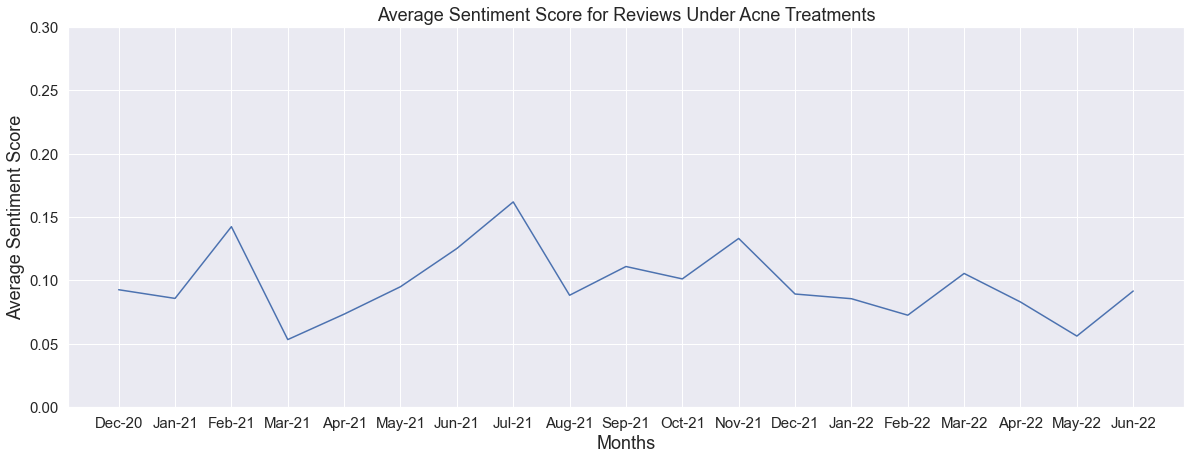

In [104]:
fig,ax = plt.subplots()
sns.lineplot(acne_total_sc['Mon_Year'],acne_total_sc['text_sentiment_sc'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel( "Months" ,fontsize = 18)
plt.ylabel( "Average Sentiment Score" , fontsize = 18 )
plt.ylim(0.0, 0.30)
plt.title("Average Sentiment Score for Reviews Under Acne Treatments", fontsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


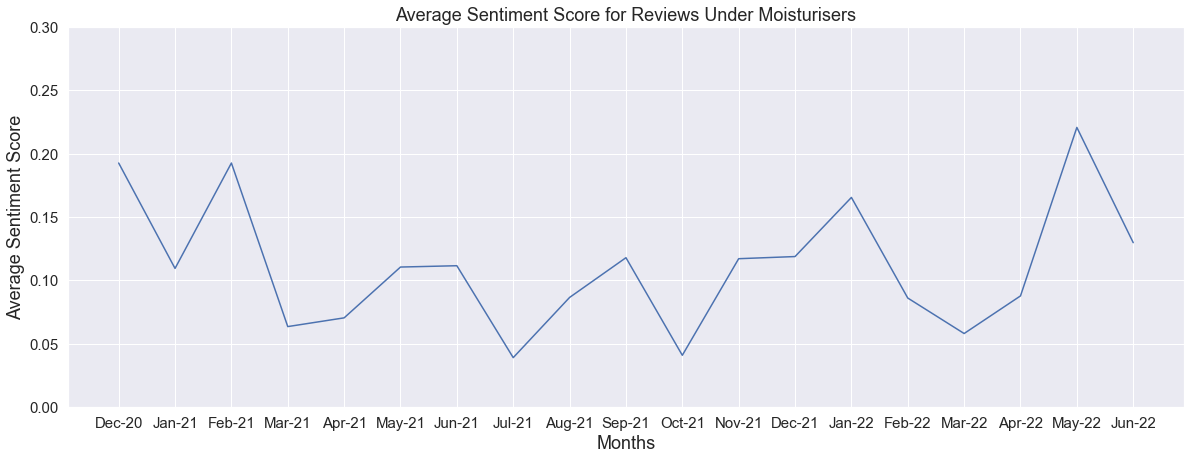

In [106]:
fig,ax = plt.subplots()
sns.lineplot(moisturiser_total_sc['Mon_Year'],moisturiser_total_sc['text_sentiment_sc'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel( "Months" ,fontsize = 18)
plt.ylabel( "Average Sentiment Score" , fontsize = 18 )
plt.ylim(0, 0.30)
plt.title("Average Sentiment Score for Reviews Under Moisturisers", fontsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


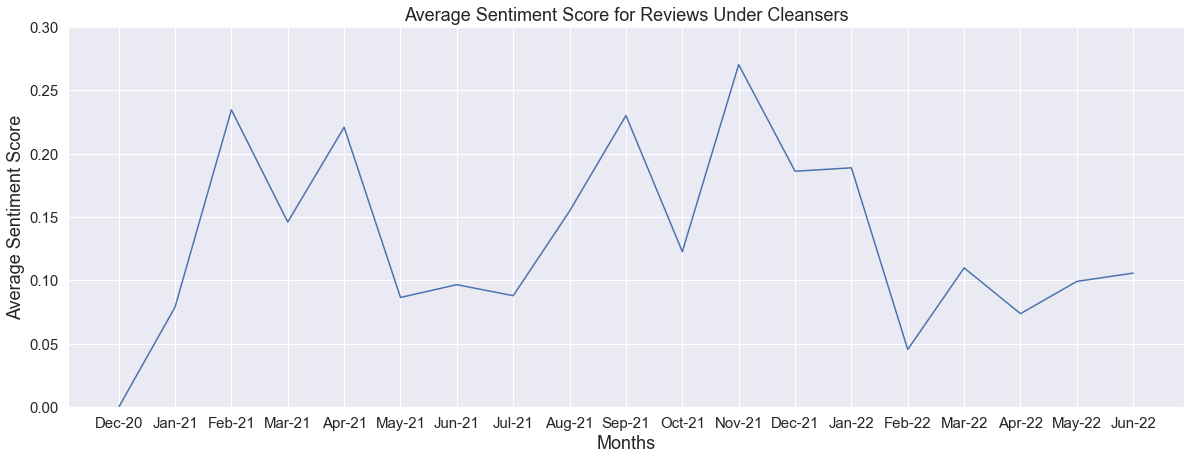

In [110]:
fig,ax = plt.subplots()
sns.lineplot(cleansers_total_sc['Mon_Year'],cleansers_total_sc['text_sentiment_sc'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel( "Months" ,fontsize = 18)
plt.ylabel( "Average Sentiment Score" , fontsize = 18 )
plt.ylim(0, 0.30)
plt.title("Average Sentiment Score for Reviews Under Cleansers", fontsize=18)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'lineplot'

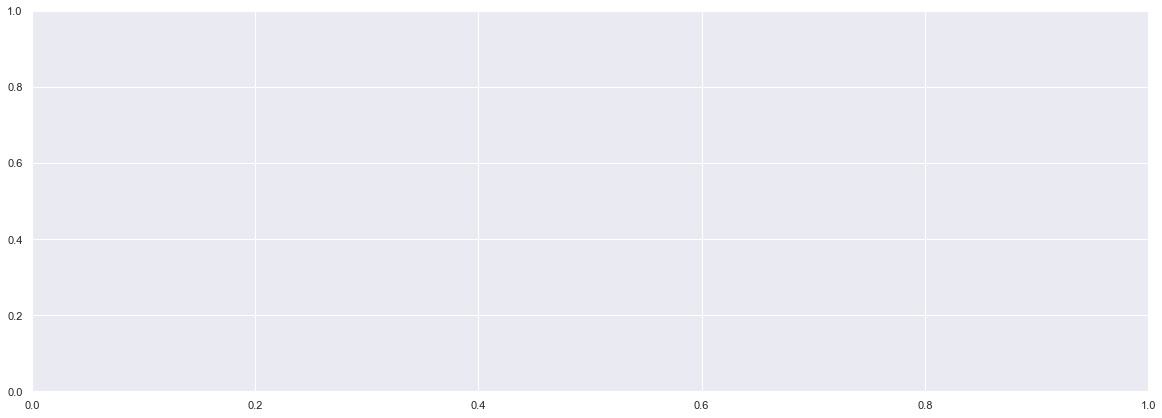

In [112]:
x=cleansers_total_sc['Mon_Year']
y=cleansers_total_sc['text_sentiment_sc']

fig, ax = plt.subplots()
ax.lineplot(cleansers_total_sc['Mon_Year'],cleansers_total_sc['text_sentiment_sc'])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.show()

In [124]:
df.columns

Index(['year', 'date', 'weeknum', 'fiscal_year', 'fiscal_month', 'retailer',
       'country', 'manufacturer', 'category', 'brand',
       ...
       'has_image_pr', 'ukey_pr', 'author_pr', 'text_pr_translated',
       'summary_pr_translated', 'text_sentiment_sc', 'summary_sentiment_sc',
       'sentiment_text', 'sentiment_summary', 'Mon_Year'],
      dtype='object', length=129)

# Line Grapghs for Ratings

In [126]:
df_acne.star_rating_pr.value_counts()

5    1485
1     328
4     294
3     224
2     153
Name: star_rating_pr, dtype: int64

In [140]:
df_acne.sort_values(by='Mon_Year',inplace=True)
df_moisturiser.sort_values(by='Mon_Year',inplace=True)
df_cleansers.sort_values(by='Mon_Year',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [141]:
df_acne.head()

,year,date,weeknum,fiscal_year,fiscal_month,retailer,country,manufacturer,category,brand,asin,title,gfo,gsr_level_1,gsr_level_2,gsr_level_3,gsr_level_4,is_competitor,isavc_vc,isinventory_vc,issales_vc,isprofitero_pr,first_party_ordered_sales_vc,first_party_ordered_sales_currency_code_vc,first_party_ordered_sales_local_vc,first_party_ordered_sales_local_currency_code_vc,first_party_ordered_units_vc,average_sales_price_vc,first_party_shipped_sales_vc,first_party_shipped_sales_currency_code_vc,shipped_cogs_amount_vc,shipped_cogs_currency_code_vc,first_party_shipped_units_vc,customer_return_vc,free_replacements_vc,preordered_revenue_amount_vc,preordered_revenue_currency_code_vc,preordered_units_vc,shipped_subcategory_sales_rank_vc,ordered_subcategory_sales_rank_vc,replenishable_out_of_stock_vc,lost_buy_box_vc,glance_views_vc,conversion_rate_vc,net_received_amount_vc,net_received_amount_currency_code_vc,net_received_units_vc,open_purchase_order_quantity_vc,inventory_sell_through_rate_vc,sellable_on_hand_inventory_amount_vc,sellable_on_hand_inventory_currency_code_vc,sellable_on_hand_amount_trailing_30_day_average_amount_vc,sellable_on_hand_amount_trailing_30_day_average_currency_code_vc,sellable_on_hand_units_vc,unsellable_on_hand_inventory_amount_vc,unsellable_on_hand_inventory_currency_code_vc,unsellable_on_hand_amount_trailing_30_day_average_amount_vc,unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc,unsellable_on_hand_units_vc,aged_90_plus_days_sellable_inventory_amount_vc,aged_90_plus_days_sellable_inventory_currency_code_vc,aged_90_plus_days_sellable_amount_trailing_30_day_average_amount_vc,aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc,aged_90_plus_days_sellable_units_vc,unhealthy_inventory_amount_vc,unhealthy_inventory_currency_code_vc,unhealthy_units_trailing_30_day_average_vc,unhealthy_units_vc,unfilled_customer_ordered_units_vc,available_units_vc,weeks_on_hand_vc,receive_fill_rate_vc,overall_vendor_lead_time_vc,selling_program_name_vc,availability_pr,regular_price_pr,promotion_text_pr,promotion_price_pr,first_party_won_buy_box_pr,third_party_seller_pr,add_on_item_pr,prime_exclusive_pr,promo_type_pr,product_title_vc,parent_asin_vc,isbn_13_vc,ean_vc,upc_vc,release_date_vc,list_price_vc,binding_vc,author_artist_vc,sitb_vc,clothing_size_vc,clothing_size_width_vc,product_group_vc,replenishment_code_vc,model_style_number_vc,colour_vc,colour_count_vc,prep_instructions_required_vc,prep_instructions_vendor_state_vc,brand_code_vc,brand_vc,manufacturer_code_vc,parent_manufacturer_code_vc,local_currency,target_currency,ex_rate,date&asin,summary_pr,text_pr,star_rating_pr,unique_pr,duplicate_group_pr,review_url_pr,manufacturer_comment_pr,manufacturer_comment_text_pr,manufacturer_comment_date_pr,has_image_pr,ukey_pr,author_pr,text_pr_translated,summary_pr_translated,text_sentiment_sc,summary_sentiment_sc,sentiment_text,sentiment_summary,Mon_Year
10,2021,2021-04-18,16,2021,4,Amazon 1P,Germany,JOHNSON & JOHNSON,EVERYDAY FACE,NEUTROGENA,B082VNCDC5,"Neutrogena Anti-Pickel Gesichtsreinigung, Tägl...",Skin Health,Face Care,Acne Treatments,NaN,NaN,False,Yes,True,True,Yes,99.4,USD,82.67,EUR,22,3.8,48.62,EUR,49.66,EUR,13,0,0,0,EUR,0.0,395.0,447.0,0.0000,0.0,190,0.1158,0.00,EUR,0.0,582.0,0.0,2112.46,EUR,1662.15,EUR,553.0,1283.08,EUR,334.30,EUR,336.0,0.00,EUR,1.98,EUR,0.0,0.0,EUR,0.0,0.0,52.0,501.0,3.0,0.0,5.99,AMAZON_RETAIL,Y,4.45,NaN,NaN,NaN,NaN,0.0,0.0,NaN,"Neutrogena Anti-Pickel Gesichtsreinigung, Tägl...",B09DB275YG,-,3.574661e+12,UNKNOWN,2020-01-16,4.19,health_and_beauty,NaN,N,150,ml (1er,Beauty,PR,90606,UNKNOWN,1.0,-,Amazon,NEUVP,Neutrogena,JOMO1,JOMO1,EUR,USD,1.202495,44304_B082VNCDC5,"Gut gemacht, Neutrogena",Der Toner hilft mir bei Mitessern ungemein. Es...,5,1,ff5f6eaf471f20625d3b7f4f208ae4a8,https://www.amazon.de/gp/customer-reviews/R2NK...,0,NaN,NaN,0,af8562bb745462b08359e33e17775ab7,Sahil Chachondia,der toner hilft mir bei mitessern ungemein es ...,gut gemacht neutrogena,0.000000,0.0,Neut

In [142]:
acne_ratings=df_acne.groupby(['Mon_Year'])[['star_rating_pr']].mean().reset_index()
moisturiser_ratings=df_moisturiser.groupby(['Mon_Year'])[['star_rating_pr']].mean().reset_index()
cleansers_ratings=df_cleansers.groupby(['Mon_Year'])[['star_rating_pr']].mean().reset_index()

In [144]:
month_dict = {'Dec-20':1,'Jan-21':2,'Feb-21':3, 'Mar-21':4, 'Apr-21':5, 'May-21':6, 'Jun-21':7, 'Jul-21':8, 
              'Aug-21':9, 'Sep-21':10,'Oct-21':11, 'Nov-21':12, 'Dec-21':13,'Jan-22':14,'Feb-22':15,'Mar-22':16,
              'Apr-22':17,'May-22':18,'Jun-22':19}

In [145]:
acne_ratings=acne_ratings.sort_values('Mon_Year', key = lambda x : x.apply (lambda x : month_dict[x]))
moisturiser_ratings=moisturiser_ratings.sort_values('Mon_Year', key = lambda x : x.apply (lambda x : month_dict[x]))
cleansers_ratings=cleansers_ratings.sort_values('Mon_Year', key = lambda x : x.apply (lambda x : month_dict[x]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


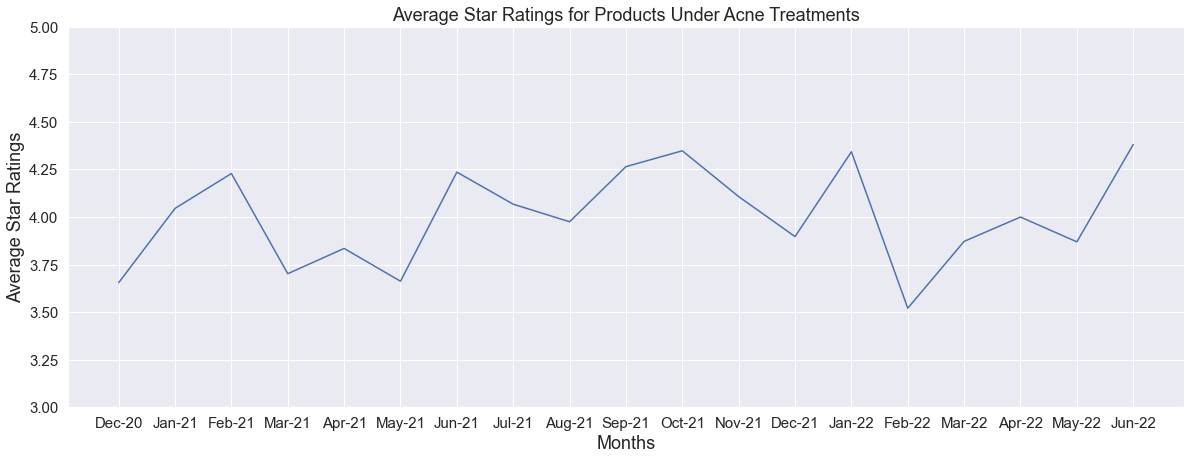

In [158]:
fig,ax = plt.subplots()
sns.lineplot(acne_ratings['Mon_Year'],acne_ratings['star_rating_pr'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel( "Months" ,fontsize = 18)
plt.ylabel( "Average Star Ratings" , fontsize = 18 )
plt.ylim(3, 5)
plt.title("Average Star Ratings for Products Under Acne Treatments", fontsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


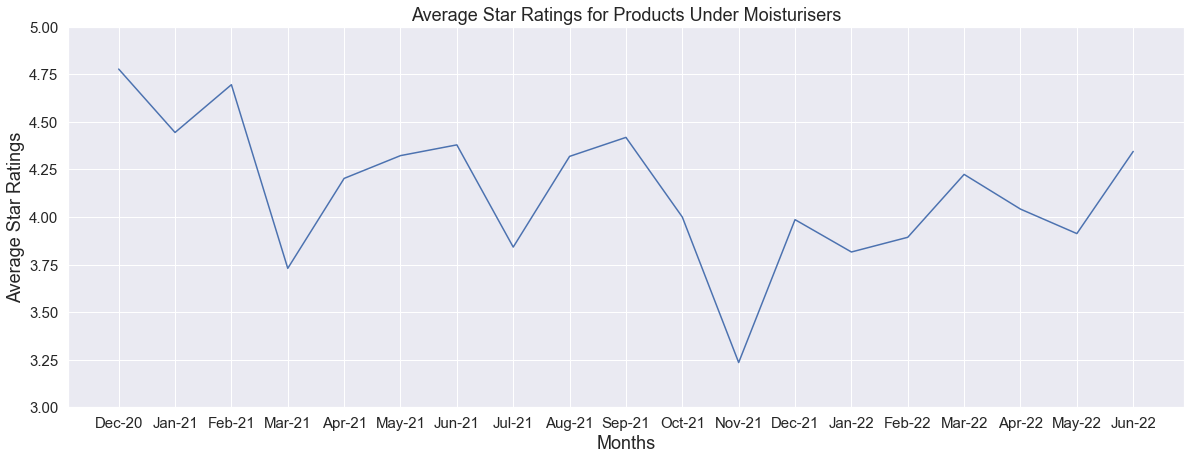

In [159]:
fig,ax = plt.subplots()
sns.lineplot(moisturiser_ratings['Mon_Year'],moisturiser_ratings['star_rating_pr'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel( "Months" ,fontsize = 18)
plt.ylabel( "Average Star Ratings" , fontsize = 18 )
plt.ylim(3, 5)
plt.title("Average Star Ratings for Products Under Moisturisers", fontsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


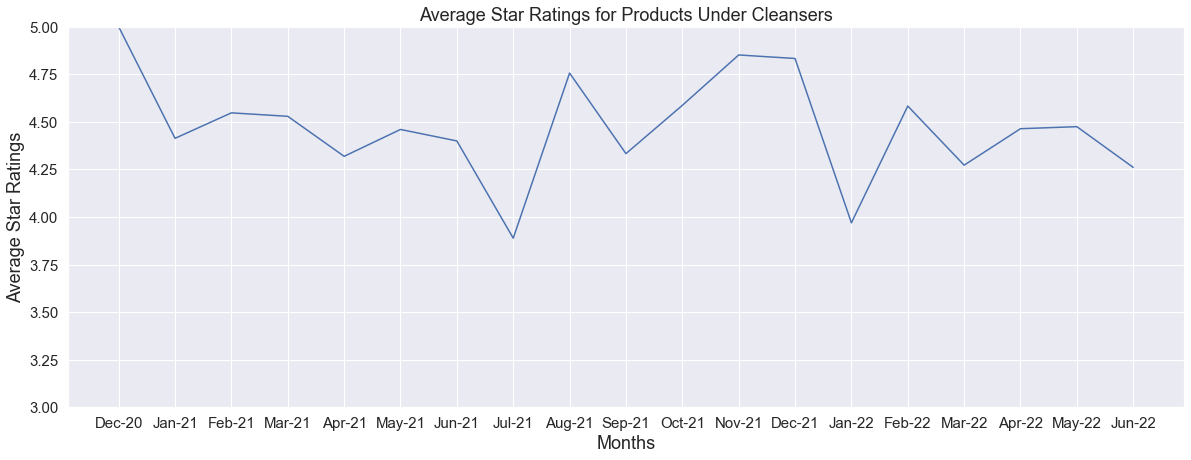

In [160]:
fig,ax = plt.subplots()
sns.lineplot(cleansers_ratings['Mon_Year'],cleansers_ratings['star_rating_pr'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel( "Months" ,fontsize = 18)
plt.ylabel( "Average Star Ratings" , fontsize = 18 )
plt.ylim(3, 5)
plt.title("Average Star Ratings for Products Under Cleansers", fontsize=18)
plt.show()